# Student Activity: Financial Forecasting

In this activity, Harold's manager wants Harold to take a look at one year's worth of `TSLA` stock prices and plot a potential stock trajectory for where `TSLA` stock prices could go in the next `3` years. In addition, he would like to know how a $10,000 investment would perform given the simulated results.

Help Harold by creating a Monte Carlo simulation that simulates the next `252 * 3` trading days using three years worth of `TSLA` stock data. Plot the simulated results of `TSLA` daily returns over the next `3` years as well as the corresponding simulated outcomes.

In [8]:
# Import libraries and dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [9]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")


api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get 3 Years Worth of Data via API Call and Read in as DataFrame 

In [10]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to "1Day"
timeframe = "1Day"

# Set start and end datetimes of 3 years from Today
end_date = ( pd.Timestamp("today", tz="America/New_York") - pd.DateOffset() ).isoformat()
start_date =( pd.Timestamp("today", tz="America/New_York") - pd.DateOffset(years=3) ).isoformat()
# Get 3 years worth of historical data for TSLA
# YOUR CODE HERE!
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date
).df
ticker_data

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-04-10 04:00:00+00:00,276.77,278.38,272.8925,276.06,7062386,67469,276.106686
2019-04-11 04:00:00+00:00,268.30,270.50,265.6000,268.42,9839027,110279,267.836190
2019-04-12 04:00:00+00:00,269.99,271.95,266.8300,267.70,6762761,67156,269.059168
2019-04-15 04:00:00+00:00,268.63,268.88,258.6300,266.38,10039579,109071,262.882563
2019-04-16 04:00:00+00:00,265.75,275.00,264.7200,273.36,7273280,80304,271.724838
...,...,...,...,...,...,...,...
2022-04-04 04:00:00+00:00,1089.50,1149.91,1072.5300,1145.45,27379536,858769,1122.313530
2022-04-05 04:00:00+00:00,1135.80,1152.87,1087.3000,1091.26,26672459,858370,1114.109057
2022-04-06 04:00:00+00:00,1073.62,1079.00,1027.7000,1045.76,29760694,962178,1047.253174


In [11]:
# Reorganize the DataFrame
ticker_data = pd.concat([ticker_data], axis=1, keys=["TSLA"])

# Display sample data
ticker_data.head()

TSLA                                      \
                             open    high       low   close    volume   
timestamp                                                               
2019-04-10 04:00:00+00:00  276.77  278.38  272.8925  276.06   7062386   
2019-04-11 04:00:00+00:00  268.30  270.50  265.6000  268.42   9839027   
2019-04-12 04:00:00+00:00  269.99  271.95  266.8300  267.70   6762761   
2019-04-15 04:00:00+00:00  268.63  268.88  258.6300  266.38  10039579   
2019-04-16 04:00:00+00:00  265.75  275.00  264.7200  273.36   7273280   

                                                   
                          trade_count        vwap  
timestamp                                          
2019-04-10 04:00:00+00:00       67469  276.106686  
2019-04-11 04:00:00+00:00      110279  267.836190  
2019-04-12 04:00:00+00:00       67156  269.059168  
2019-04-15 04:00:00+00:00      109071  262.882563  
2019-04-16 04:00:00+00:00       80304  271.724838

### Run the Monte Carlo Simulation

In [12]:
# Set number of simulations
num_sims = 1000

# Configure a Monte Carlo simulation to forecast three years daily returns
# YOUR CODE HERE!
MC_TSLA = MCSimulation(
    portfolio_data = ticker_data,
    num_simulation = num_sims,
    num_trading_days = 252 * 3
)

In [13]:
# Run Monte Carlo simulations to forecast three years daily returns
# YOUR CODE HERE!
MC_TSLA.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akanksha/Rutgers/Rutgers-FinTech/01-Lesson-Plans/05-APIS/3/Activities/06-Stu_Financial_Forecasting/Unsolved/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009795,0.991521,0.992784,0.913559,1.029499,0.946811,1.004579,1.074171,1.016171,1.122354,...,1.033237,1.032020,0.979524,1.102382,1.000851,0.972354,1.002287,1.025908,1.046464,0.928266
2,1.048001,1.018310,0.997351,0.933813,1.067147,0.984214,1.098507,1.113694,1.032065,1.186618,...,1.012596,0.929067,0.893447,1.069165,1.039624,1.028907,1.078526,0.981880,1.013590,1.012354
3,1.115785,1.009337,1.007141,0.951757,1.120774,1.025227,1.124908,1.167233,1.081665,1.131141,...,0.999580,0.951195,0.931106,1.045719,1.042119,1.022777,1.094398,1.109559,1.056394,0.967386
4,0.989709,1.074796,1.002916,0.906297,1.082457,1.054883,1.100597,1.213921,1.060970,1.100571,...,0.981192,0.950466,0.910212,1.043374,1.063672,1.012532,1.025606,1.128675,1.081757,1.014884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,32.972483,1.285985,1.349222,123.151369,15.022443,5.667208,0.211627,4.439873,4.187722,29.890363,...,7.138575,3.690457,0.740525,23.030536,10.642904,3.914534,1.205545,6.831195,9.297488,1.355178
753,29.899384,1.389238,1.505765,126.600599,14.345572,5.331484,0.190313,4.390170,4.391781,31.489591,...,7.400333,4.272005,0.740596,24.046007,10.928789,3.778170,1.220610,6.594852,8.729091,1.386080
754,27.544768,1.365055,1.486702,130.062404,13.950893,5.678324,0.178943,4.304419,4.278766,31.625529,...,7.693757,4.092167,0.728534,23.856337,10.757246,3.796110,1.218942,6.705992,8.527988,1.456901
755,31.037042,1.365985,1.682271,135.252832,13.406130,5.723880,0.165087,4.228522,4.497157,33.695325,...,7.586839,4.009763,0.734165,23.015306,10.632736,4.004372,1.305818,6.600815,8.692202,1.504834


### With these results, create a DataFrame which holds the mean, median, minimum, and maximum simulated performance.

In [14]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(MC_TSLA.simulated_return.mean(axis=1)),
    "median": list(MC_TSLA.simulated_return.median(axis=1)),
    "min": list(MC_TSLA.simulated_return.min(axis=1)),
    "max": list(MC_TSLA.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns.head()

,mean,median,min,max
0,1.000000,1.000000,1.000000,1.000000
1,1.003599,1.000765,0.856500,1.167630
2,1.007112,1.005226,0.812336,1.284075
3,1.011710,1.011241,0.756740,1.351298
4,1.014229,1.009514,0.723915,1.402890


### Plot the Simulated Cumulative Return Trajectory for `TSLA` over the Next Three Years (252*3 Trading Days)

#### Use just the `mean` and `median` forecasts.

<AxesSubplot:>

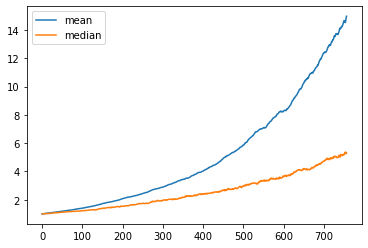

In [18]:
# Use the `plot` function to visually analyze TSLA cumulative returns over the next three hears
# (Plot both mean and median forecasted cumulative return)
# YOUR CODE HERE!
df_simulated_returns_mean_median = df_simulated_returns[['mean','median']]
df_simulated_returns_mean_median.plot()

### Calculate the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next Three Years

In [19]:
# Set initial investment
initial_investment = 10000

# Multiply an initial investment by the daily returns of simulative stock prices to return the progression of daily returns in terms of money
# YOUR CODE HERE!
cumulative_pnl = initial_investment * df_simulated_returns
# Display sample data
cumulative_pnl.head()

,mean,median,min,max
0,10000.000000,10000.000000,10000.000000,10000.000000
1,10035.986432,10007.648793,8564.998213,11676.302980
2,10071.119050,10052.255031,8123.355508,12840.745548
3,10117.101123,10112.409432,7567.401070,13512.979201
4,10142.289329,10095.139629,7239.146028,14028.896124


### Plot the Simulated Profits/Losses of $10,000 Investment in `TSLA` Over the Next `252` Trading Days

<AxesSubplot:>

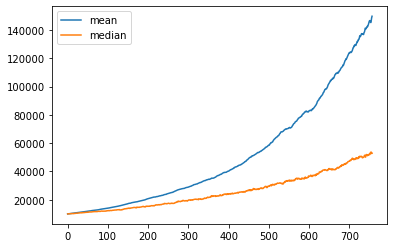

In [22]:
# Use the 'plot' function to create a chart of the simulated profits/losses
# YOUR CODE HERE!
cumulative_pnl[['mean','median']].plot()

### Calculate the range of the possible outcomes of our $10,000 investments in `TSLA` stocks

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
# Hint: Use the `summarize_cumulative_return` function
tbl = MC_TSLA.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           1000.000000
mean              14.971968
std               36.352418
min                0.044485
25%                1.955437
50%                5.291623
75%               13.522041
max              549.035613
95% CI Lower       0.354836
95% CI Upper      82.020516
Name: 756, dtype: float64


In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
# YOUR CODE HERE!
ci_lower = round(tbl['95% CI Lower']*initial_investment,2)
ci_upper = round(tbl['95% CI Upper']*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${ci_lower} and ${ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $3548.36 and $820205.16.
